In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
 
# baseline data
df_baseline = pd.read_csv('/mnt/data/churndata.csv', header=0, index_col=0)
create_dummies = pd.get_dummies(df_baseline['churn'],prefix='churn', drop_first=True)  
df_baseline=pd.concat([df_baseline,create_dummies],axis=1)
df_baseline = df_baseline.drop(['churn'], axis=1)
baseline_cols = ['consecmonths', 'KPI_DeviceSat', 'KPI_NetworkQual']
y_baseline = df_baseline['churn_Y'].values
X_baseline = df_baseline[baseline_cols].values
 
 
#Get Baseline Model
import pickle
baseline_model = pickle.load(open('/mnt/output/baseline.pkl', 'rb'))
tprs_baseline = []
aucs_baseline = []
accs_baseline = []
mean_fpr_baseline = np.linspace(0, 1, 100)
 
probas_ = baseline_model.predict_proba(X_baseline)
preds_ = baseline_model.predict(X_baseline)
fpr_baseline, tpr_baseline, thresholds_baseline = metrics.roc_curve(y_baseline, probas_[:, 1])
tprs_baseline.append(np.interp(mean_fpr_baseline, fpr_baseline, tpr_baseline))
tprs_baseline[-1][0] = 0.0
roc_auc_baseline = metrics.auc(fpr_baseline, tpr_baseline)
aucs_baseline.append(roc_auc_baseline)
accuracy_baseline = metrics.accuracy_score(y_baseline, preds_)
accs_baseline.append(accuracy_baseline)
acc_baseline = np.mean(accs_baseline)
auc_baseline = np.mean(aucs_baseline)
 
# Make Plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.plot(fpr_baseline,tpr_baseline,color='b', label= 'Baseline: AUC = %0.3f Acc = %0.3f' % (auc_baseline, acc_baseline))
 
 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and Metrics for the Baseline Model')
plt.legend(loc="lower right")
 
#write out resutls
plt.savefig('/mnt/output/AUC_ACC_Baseline.png', format='png')
plt.gcf().clear()

In [2]:
metrics.confusion_matrix(y_baseline, preds_)

array([[7387,  220],
       [ 357,   40]])

In [14]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.gcf().subplots_adjust(bottom=0.25)
    plt.savefig('/mnt/output/ConfMatx_Baseline.png', format='png')
    plt.show()
    plt.gcf().clear()

<Figure size 432x288 with 0 Axes>

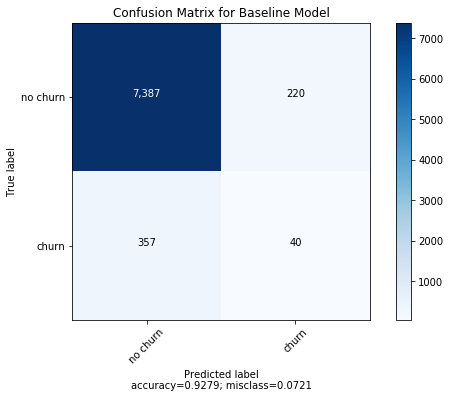

In [15]:
plot_confusion_matrix(cm           = metrics.confusion_matrix(y_baseline, preds_), 
                      normalize    = False,
                      target_names = ['no churn', 'churn'],
                      title        = "Confusion Matrix for Baseline Model")